# Client getINNOtized 
#### Sales data was collected for each month in the entire year of 2019. 


### 1. Business Understanding
We are assigned a client by getINNOtized to design and deliver an end-to-end business  intelligence solution. Our client has collected transactional data for the year 2019 but hasn’t been able to  put it to good use. 
Sales data was collected for each month in the entire year of 2019. 
The data for the first half of the year (January to June) was collected in excel and saved as csv files before management decided to use databases to store their data.

### Objective
 The client hopes you can analyze the data and put together a report  to help them find opportunities to drive more sales and work more efficiently. 

 ### **Questions**
1. How much money did we make this year? 

2. Can we identify any seasonality in the  sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities  ordered? 

7. You are required to show additional details from your findings in your data.

#### 2. Data Understanding
Here, we explored and familiarized with data the client by getINNOtized from 2019 . This involved examining the structure, quality, and content of the dataset. We further identified the relevant variables, data types, and potential issues, such as missing values or outliers.

## Installations

Packages for accessing remote database with data

In [1]:

import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

# Data handling

import pandas as pd
import numpy as np

# Data Visualisation

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

In [4]:
import zipfile
import os

# path to the file zip
zip_file_path = "OneDrive_1_2-9-2024.zip"

# Folder 
extract_to_dir = "data"

# Create folder if not exist
if not os.path.exists(extract_to_dir):
    os.makedirs(extract_to_dir)

# Unzip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print("file unzip sucessfully.")


Fichier zip décompressé avec succès.


### Load Data

In [2]:
#Read data january
data_jan =pd.read_csv('data/Sales_January_2019.csv')
data_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
data_jan.describe().T

,count,unique,top,freq
Order ID,9697,9269,Order ID,16
Product,9697,20,USB-C Charging Cable,1171
Quantity Ordered,9697,8,1,8795
Price Each,9697,19,11.95,1171
Order Date,9697,8077,Order Date,16
Purchase Address,9697,9161,Purchase Address,16


In [4]:
data_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [5]:
data_jan.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [6]:
#let's check the dimension of our data januray
data_jan.shape

(9723, 6)

In [7]:
data_jan.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
#Read data February
data_feb =pd.read_csv('data/Sales_February_2019.csv')
data_feb.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [9]:
data_feb.shape

(12036, 6)

In [10]:
#Read data February
data_March =pd.read_csv('data/Sales_March_2019.csv')
data_March.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [11]:
data_March.shape

(15226, 6)

In [12]:
#Read data April
data_April =pd.read_csv('data/Sales_April_2019.csv')
data_April.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
data_April.shape

(18383, 6)

In [14]:
#load data May
data_May = pd.read_csv('data/Sales_May_2019.csv')
data_May.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [15]:
data_May.shape

(16635, 6)

In [16]:
#load June data
data_jun = pd.read_csv('data/Sales_June_2019.csv')
data_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [17]:
data_July = pd.read_csv('data/Sales_July_2019.csv')
data_July.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [18]:
data_Aug = pd.read_csv('data/Sales_August_2019.csv')
data_Aug.shape

(12011, 6)

In [19]:
data_Aug.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [20]:
data_Sept = pd.read_csv('data/Sales_September_2019.csv')
data_Sept.shape

(11686, 6)

In [21]:
data_Oct = pd.read_csv('data/Sales_October_2019.csv')
data_Oct.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [22]:
data_Oct.shape

(20379, 6)

In [23]:
#load data November
data_Nov = pd.read_csv('data/Sales_November_2019.csv')
data_Nov.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [24]:
data_dec = pd.read_csv('data/Sales_December_2019.csv')
data_dec.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


In [25]:
data_dec.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


##### Data Merge


In [26]:
data_six_last_mont =pd.concat ([data_July,data_Aug,data_Sept,data_Nov,data_dec],ignore_index=False)
data_six_last_mont.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [27]:
data_six_first_month = pd.concat([data_jan,data_feb,data_March,data_April,data_May,data_jun],ignore_index=True)
data_six_first_month.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [28]:
#check columns six first month
data_six_first_month.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [29]:
#let's check data sixe last month
data_six_last_mont.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

#### Rename Column data six last months
We noticed that for the columns of the first 6 months are different from that of the last 6 months. Let's try to rename that of the last 6 months in order to confirm the data.

In [30]:
df1 = pd.DataFrame(data_six_last_mont)
df1 = df1.rename(columns={
    'Order_ID':'Order ID',
    'Quantity_Ordered':'Quantity Ordered',
    'Price_Each':'Price Each',
    'Order_Date':'Order Date',
    'Purchase_Address':'Purchase Address'
})

df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [31]:
#let's drop our Order ID
df1.drop(['Order ID'],axis=1,inplace=True)
df1.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [32]:
#let's drop our columns for data six irst month
data_six_first_month.drop(['Order ID'],axis=1,inplace=True)
data_six_first_month.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Merge All Data 
Now we will merge the data in order to have a unique dataset

In [33]:
data = pd.concat([df1,data_six_first_month],ignore_index=False)
data.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.0,150.0,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.0,300.0,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [36]:
#save data
data.to_csv('data/Sale_data.csv')

In [34]:
data_copy = data.copy()
data_copy.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.0,150.0,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.0,300.0,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


#### 2.Data Cleaning

In [35]:
data_copy.tail()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
85620,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
85621,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
85622,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
85623,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
85624,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [36]:
#let's check shape
data_copy.shape

(166471, 5)

Our new dataset now has 5 columns and 166471 rows. On the other hand, in our describe we don't see the samething, this is certainly due to the presence of missing values.

#### Exploratory Data Analysis: EDA

##### Analysis of Data Shape

In [37]:
#### let's check our contain data
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166471 entries, 0 to 85624
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           165988 non-null  object
 1   Quantity Ordered  165826 non-null  object
 2   Price Each        165826 non-null  object
 3   Order Date        165826 non-null  object
 4   Purchase Address  165988 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


###### 2.1 MISSING VALUE

In [38]:
data_copy.isna().sum()

Product             483
Quantity Ordered    645
Price Each          645
Order Date          645
Purchase Address    483
dtype: int64

Apparently all our 5 columns contain missing values, let's try to see more of what these missing values hide by column.

In [39]:
#let's check our Product column
#data_copy.isna().sum()
((data_copy.isna().sum()/data_copy.shape[0])*100).sort_values(ascending=True)

Product             0.290141
Purchase Address    0.290141
Quantity Ordered    0.387455
Price Each          0.387455
Order Date          0.387455
dtype: float64

***'Product' and 'Purchase Address'*** have a missing value rate of 0.29%.

***'Quantity Ordered', 'Price Each', and 'Order Date'*** have a slightly higher missing value rate of 0.39%.

Percentage too low compared to the size of our dataset, let's use the deletion method to eliminate these missing values

In [40]:
#let's drop missing values
data_cleaning = data_copy.dropna()
data_cleaning.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.0,150.0,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.0,300.0,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [41]:
#let's check if we are a missing value our new dataset
data_cleaning.isna().sum()

Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [42]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165826 entries, 0 to 85624
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           165826 non-null  object
 1   Quantity Ordered  165826 non-null  object
 2   Price Each        165826 non-null  object
 3   Order Date        165826 non-null  object
 4   Purchase Address  165826 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


Now that our new dataset is clean with 165826 rows, however, there's no guarantee that we don't have any duplicates. Let's try to verify that.

In [43]:
#let's check duplicated
data_duplicated = data_cleaning.duplicated()

if data_duplicated.empty:
    print('he is no duplicated')
else:
    print('There are a duplicated')
    print(data_duplicated.sum())

There are a duplicated
390


In [44]:
data_cleaning.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.0,150.0,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.0,300.0,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [45]:
#let's drop duplicated 
data_cleaning = data_cleaning.drop_duplicates()

In [46]:
#check again if we are duplicated
data_cleaning.duplicated().sum()

0

In [47]:
data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165436 entries, 0 to 85624
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           165436 non-null  object
 1   Quantity Ordered  165436 non-null  object
 2   Price Each        165436 non-null  object
 3   Order Date        165436 non-null  object
 4   Purchase Address  165436 non-null  object
dtypes: object(5)
memory usage: 7.6+ MB


After cleaning our dataset by removing missing values and duplicates, we now have a total of 165436 rows. This cleaning step allows us to have higher quality data for our subsequent analyses.

In [48]:
#Let's check our data clean information
pd.set_option('display.float_format', '{:,.2f}'.format)
data_cleaning.describe().T

,count,unique,top,freq
Product,165436,20,USB-C Charging Cable,19421
Quantity Ordered,165436,18,1,77098
Price Each,165436,40,11.95,9931
Order Date,165436,127549,2015-12-19 20:16:00.0000000,8
Purchase Address,165436,128509,"193 Forest St, San Francisco, CA 94016",9


This provides an overview of the distibution of our data after the cleaning process

**For numerical variables:**

**. 'Quantity Ordered' and 'Price Each'** have the same statistics as before, with 165436 entries, 18 unique values, and their most frequent value (top) is 1 for 'Quantity Ordered' and 11.95 for 'Price Each'.

**.'Order Date'** now indicates that there are 127549 unique dates, and the most frequent date (top) is '2015-12-19 20:16:00.0000000' with 8 occurrences.

**For categorical variables:**

**'Product' and 'Purchase Address'** also remain the same, with 165436 entries and 20 unique products and 128509 unique addresses. The most frequent product is 'USB-C Charging Cable', and the most frequent address is '193 Forest St, San Francisco, CA 94016'.

In [49]:
#let's change our Order Date format
data_cleaning['Order Date']

0        2026-07-19 16:51:00.0000000
1        2005-07-19 08:55:00.0000000
2        2029-07-19 12:41:00.0000000
3        2028-07-19 10:15:00.0000000
4        2031-07-19 02:13:00.0000000
                    ...             
85620                 06/07/19 19:02
85621                 06/01/19 19:29
85622                 06/22/19 18:57
85623                 06/26/19 18:35
85624                 06/25/19 14:33
Name: Order Date, Length: 165436, dtype: object

In [50]:
data_cleaning['Order Date']  = pd.to_datetime(data_cleaning['Order Date'],errors='coerce')

#convert the format 06/01/19 19:29 to format 'YYY-MM-DD HH:MM:SS
data_cleaning['Order Date'] = data_cleaning['Order Date'].dt.strftime('%Y-%m-%d %H:%M')

#Convert format '2023-07-19 23:51:00.00000 to include only hour and minut
data_cleaning['Order Date'] = pd.to_datetime(data_cleaning['Order Date']).dt.strftime('%Y-%m-%d %H:%M')

data_cleaning.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.00,150.00,2026-07-19 16:51,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.00,300.00,2005-07-19 08:55,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.00,3.84,2029-07-19 12:41,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.00,3.84,2028-07-19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.00,2.99,2031-07-19 02:13,"824 Forest St, Seattle, WA 98101"


In [51]:
#let's check the unique 
data_cleaning['Order Date'].unique()

array(['2026-07-19 16:51', '2005-07-19 08:55', '2029-07-19 12:41', ...,
       '2009-12-19 06:43', '2003-12-19 10:39', nan], dtype=object)

In [52]:
data_cleaning.shape

(165436, 5)

In [53]:
data_cleaning.isna().sum()

Product                 0
Quantity Ordered        0
Price Each              0
Order Date          85113
Purchase Address        0
dtype: int64

In [54]:
((data_cleaning.isna().sum()/data_cleaning.shape[0])*100).sort_values(ascending=True)

Product             0.00
Quantity Ordered    0.00
Price Each          0.00
Purchase Address    0.00
Order Date         51.45
dtype: float64

In [60]:
#Replce nan 
data_cleaning['Order Date'].fillna(method='ffill',inplace=True)

In [61]:
#Let's check again
data_cleaning['Order Date'].unique()

array(['2026-07-19 16:51', '2005-07-19 08:55', '2029-07-19 12:41', ...,
       '2001-12-19 12:01', '2009-12-19 06:43', '2003-12-19 10:39'],
      dtype=object)

In [62]:
data_cleaning.isna().sum()

Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [63]:
data_cleaning.shape

(165436, 5)

In [64]:
data_cleaning['Quantity Ordered'].value_counts()

Quantity Ordered
1                   77098
1.0                 72755
2                    6146
2.0                  5786
3                    1357
3.0                  1270
4                     357
4.0                   351
5                     117
5.0                    98
6.0                    44
6                      29
7.0                    14
7                       7
8.0                     3
9.0                     2
Quantity Ordered        1
9                       1
Name: count, dtype: int64

In [65]:
#lets' replace string to int
data_cleaning['Quantity Ordered'].replace('Quantity Ordered',0.0,inplace=True)

In [66]:
#let's check again our column Quantity Ordered
data_cleaning['Quantity Ordered'].value_counts()

Quantity Ordered
1      77098
1.0    72755
2       6146
2.0     5786
3       1357
3.0     1270
4        357
4.0      351
5        117
5.0       98
6.0       44
6         29
7.0       14
7          7
8.0        3
9.0        2
0.0        1
9          1
Name: count, dtype: int64

In [68]:
#Convert column Quantity Ordered to float
data_cleaning['Quantity Ordered']=data_cleaning['Quantity Ordered'].astype(float)


In [69]:
data_cleaning['Quantity Ordered'].unique()

array([1., 5., 2., 3., 4., 6., 7., 8., 9., 0.])

In [70]:
data_cleaning['Quantity Ordered'].isna().sum()

0

In [71]:
#Let's do the same for Price 
data_cleaning['Price Each'].unique()

array([150.0, 300.0, 3.839999914169312, 2.990000009536743,
       99.98999786376952, 600.0, 11.949999809265137, 14.949999809265137,
       379.989990234375, 11.989999771118164, 400.0, 149.99000549316406,
       109.98999786376952, 999.989990234375, 389.989990234375, 1700.0,
       700.0, '700', '14.95', '11.99', '149.99', '2.99', '389.99',
       '11.95', '99.99', '150', '1700', '300', '400', '3.84', '600',
       '109.99', '379.99', '999.99', '600.0', 'Price Each', '700.0',
       '150.0', '300.0', '1700.0'], dtype=object)

In [72]:
#let's change 'Price Each' to 0 inside my column
data_cleaning['Price Each'].replace('Price Each',0.00,inplace=True)

To achieve this, you need to convert all values in the 'Price Each' column to float and remove all non-numeric characters.

In [73]:
#Convert the 'Price Each' column to string
data_cleaning['Price Each'] = data_cleaning['Price Each'].astype(str)

#Remove all non-numerical characters 
data_cleaning['Price Each'] = data_cleaning['Price Each'].str.replace(r'[^0-9]','')

#Convert the 'Price Each' column to float
data_cleaning['Price Each'] = data_cleaning['Price Each'].astype(float)

In [74]:
data_cleaning['Price Each'].unique()

array([ 150.        ,  300.        ,    3.83999991,    2.99000001,
         99.98999786,  600.        ,   11.94999981,   14.94999981,
        379.98999023,   11.98999977,  400.        ,  149.99000549,
        109.98999786,  999.98999023,  389.98999023, 1700.        ,
        700.        ,   14.95      ,   11.99      ,  149.99      ,
          2.99      ,  389.99      ,   11.95      ,   99.99      ,
          3.84      ,  109.99      ,  379.99      ,  999.99      ,
          0.        ])

In [75]:
data_cleaning.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,Apple Airpods Headphones,1.00,150.00,2026-07-19 16:51,"389 South St, Atlanta, GA 30301"
1,Flatscreen TV,1.00,300.00,2005-07-19 08:55,"590 4th St, Seattle, WA 98101"
2,AA Batteries (4-pack),1.00,3.84,2029-07-19 12:41,"861 Hill St, Atlanta, GA 30301"
3,AA Batteries (4-pack),1.00,3.84,2028-07-19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,AAA Batteries (4-pack),5.00,2.99,2031-07-19 02:13,"824 Forest St, Seattle, WA 98101"


In [76]:
#let's check for Product column
data_cleaning['Product'].unique()

array(['Apple Airpods Headphones', 'Flatscreen TV',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'Google Phone', 'LG Dryer',
       'USB-C Charging Cable', 'Lightning Charging Cable',
       '34in Ultrawide Monitor', 'Wired Headphones', 'Vareebadd Phone',
       '27in FHD Monitor', '20in Monitor', 'ThinkPad Laptop',
       '27in 4K Gaming Monitor', 'Macbook Pro Laptop', 'iPhone',
       'LG Washing Machine', 'Product'], dtype=object)

In [77]:
data_cleaning['Product'].isna().sum()

0

In [78]:
#let's check for Purchasse Address
data_cleaning['Purchase Address'].unique()

array(['389 South St, Atlanta, GA 30301', '590 4th St, Seattle, WA 98101',
       '861 Hill St, Atlanta, GA 30301', ...,
       '590 Wilson St, Los Angeles, CA 90001',
       '685 Hickory St, New York City, NY 10001',
       '209 11th St, Atlanta, GA 30301'], dtype=object)

Once the data is cleaned and all duplicated values are removed, you can save the DataFrame to a CSV file using the to_csv() method.

In [86]:
#save data
data_cleaning.to_csv('data/final_data.csv')

 ### **Questions**
1. How much money did we make this year? 

In [79]:
#Extract year from Order Date
data_cleaning['Order Date']=pd.to_datetime(data_cleaning['Order Date'],errors='coerce')
data_cleaning['Year'] = data_cleaning['Order Date'].dt.year.fillna(0).astype(int)
data_cleaning['Month'] = data_cleaning['Order Date'].dt.month.fillna(0).astype(int)
data_cleaning['Days'] = data_cleaning['Order Date'].dt.day.fillna(0).astype(int)
data_cleaning.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Days
0,Apple Airpods Headphones,1.00,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301",2026,7,19
1,Flatscreen TV,1.00,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101",2005,7,19
2,AA Batteries (4-pack),1.00,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301",2029,7,19
3,AA Batteries (4-pack),1.00,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301",2028,7,19
4,AAA Batteries (4-pack),5.00,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101",2031,7,19


In [80]:
#How much money did we make this year year=2019 
answers1 = data_cleaning.groupby('Year')['Price Each'].sum().reset_index()
answers1

,Year,Price Each
0,2001,"486,852.57"
1,2002,"489,768.49"
2,2003,"461,852.61"
3,2004,"512,171.56"
4,2005,"474,348.99"
5,2006,"496,347.22"
6,2007,"470,502.71"
7,2008,"458,026.42"
8,2009,"502,197.34"
9,2010,"523,812.23"


In [81]:
answers1[answers1['Year'] == 2019]

,Year,Price Each
18,2019,"456,677.63"


For Year 2019 the sale make is 456,677.63

In [82]:
color_pal = sns.color_palette()

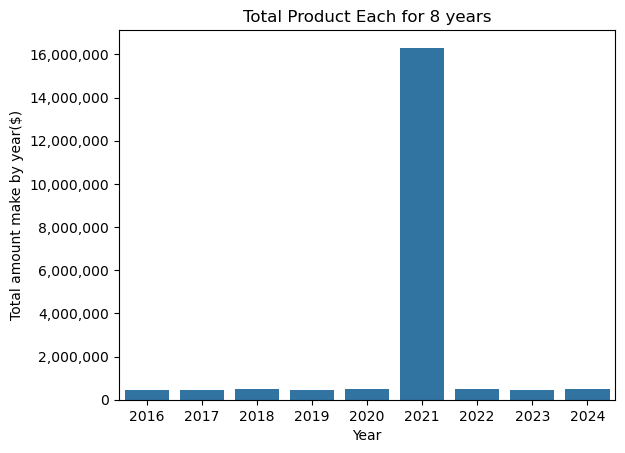

<Figure size 1200x1000 with 0 Axes>

In [83]:
years_to_plot = [2016,2017,2018,2019,2020,2021,2022,2023,2024]
#custom_palette = ["#FF5733", "#FFC300", "#DAF7A6", "#9AECDB", "#A3A1FF"]

filtered_data = answers1[answers1['Year'].isin(years_to_plot)]
plot= sns.barplot(y=filtered_data['Price Each'],x=filtered_data['Year'],color=color_pal[0])
plot.set(xlabel='Year',ylabel="Total amount make by year($)")

def comma(x,pos):
    return f'{x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma))
plt.title('Total Product Each for 8 years')
plt.figure(figsize=(12,10))
plt.show()


#### 2. Can we identify any seasonality in the  sales? 


A time series exhibiting seasonality means that there are recurring trends or patterns at regular intervals in the data, typically associated with seasons, months, weeks, or other specific time periods.

In [108]:
# import plotly.express as px
df5 = data_cleaning[['Order Date','Price Each']]
df5.set_index('Order Date')
df5.head()

,Order Date,Price Each
0,2026-07-19 16:51:00,150.00
1,2005-07-19 08:55:00,300.00
2,2029-07-19 12:41:00,3.84
3,2028-07-19 10:15:00,3.84
4,2031-07-19 02:13:00,2.99


In [109]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165436 entries, 0 to 85624
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Order Date  165436 non-null  datetime64[ns]
 1   Price Each  165436 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.8 MB


In [123]:
df5 = data_cleaning[['Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Year', 'Month', 'Days']]
filtered_df = df5.query('Year == 2019 and Year <= 2020')
filtered_df

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Days
47,AAA Batteries (4-pack),1.00,2.99,2019-07-19 10:11:00,"143 5th St, Portland, OR 97035",2019,7,19
65,Wired Headphones,1.00,11.99,2019-07-19 16:15:00,"541 Hickory St, Los Angeles, CA 90001",2019,7,19
80,AAA Batteries (4-pack),2.00,2.99,2019-07-19 18:33:00,"419 Jackson St, New York City, NY 10001",2019,7,19
90,AAA Batteries (4-pack),1.00,2.99,2019-07-19 20:29:00,"670 10th St, Atlanta, GA 30301",2019,7,19
132,Apple Airpods Headphones,1.00,150.00,2019-07-19 20:05:00,"395 West St, Austin, TX 73301",2019,7,19
...,...,...,...,...,...,...,...,...
24899,Bose SoundSport Headphones,1.00,99.99,2019-12-19 19:31:00,"50 Lake St, Boston, MA 02215",2019,12,19
24907,Wired Headphones,1.00,11.99,2019-12-19 10:35:00,"245 Wilson St, Los Angeles, CA 90001",2019,12,19
25022,Lightning Charging Cable,1.00,14.95,2019-12-19 19:28:00,"285 4th St, Los Angeles, CA 90001",2019,12,19
25064,AAA Batteries (4-pack),1.00,2.99,2019-12-19 21:09:00,"908 2nd St, Los Angeles, CA 90001",2019,12,19


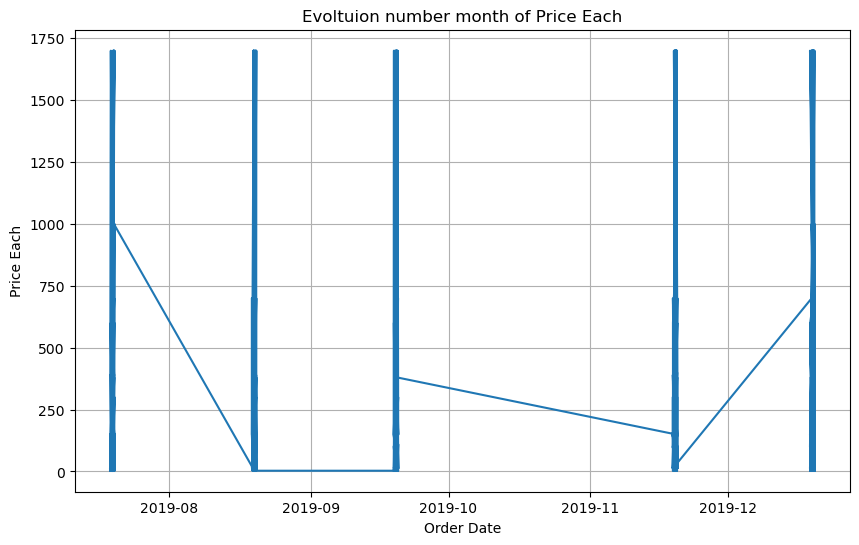

In [124]:
# df5.plot(x='Order Date', y='Price Each', style='-', figsize=(15,5), color=color_pal[0],title ='Plot of total Product')
# plt.show()

plt.figure(figsize=(10,6))
plt.plot(filtered_df['Order Date'],filtered_df['Price Each'],color=color_pal[0])
plt.title('Evoltuion number month of Price Each')
plt.xlabel('Order Date')
plt.ylabel('Price Each')
plt.grid(True)
plt.show()

In [112]:
data_2019 = data_cleaning[data_cleaning['Year']== 2019]
data_2019.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Days
47,AAA Batteries (4-pack),1.00,2.99,2019-07-19 10:11:00,"143 5th St, Portland, OR 97035",2019,7,19
65,Wired Headphones,1.00,11.99,2019-07-19 16:15:00,"541 Hickory St, Los Angeles, CA 90001",2019,7,19
80,AAA Batteries (4-pack),2.00,2.99,2019-07-19 18:33:00,"419 Jackson St, New York City, NY 10001",2019,7,19
90,AAA Batteries (4-pack),1.00,2.99,2019-07-19 20:29:00,"670 10th St, Atlanta, GA 30301",2019,7,19
132,Apple Airpods Headphones,1.00,150.00,2019-07-19 20:05:00,"395 West St, Austin, TX 73301",2019,7,19


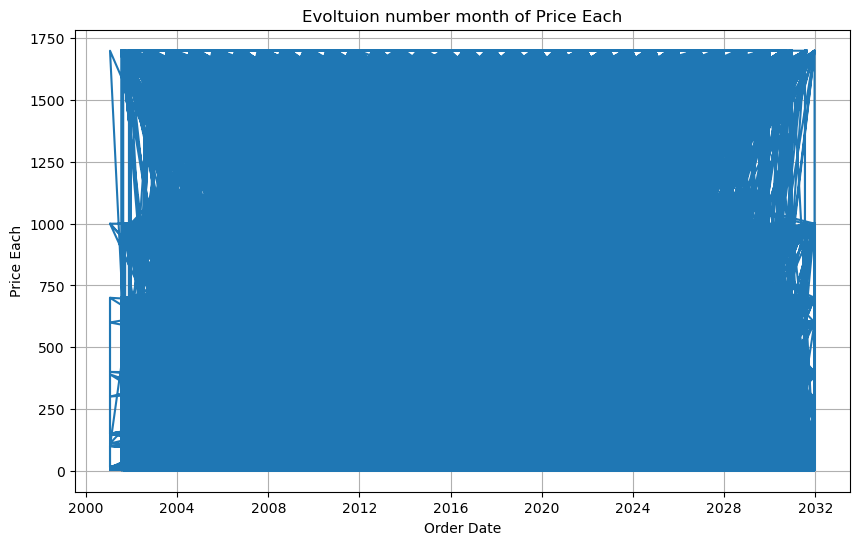

In [114]:
# data_2019.plot(x='Order Date', y='Price Each', style='-', figsize=(15,5), color=color_pal[0],title ='Plot of total Product')
# plt.show()

plt.figure(figsize=(10,6))
plt.plot(data_cleaning['Order Date'],data_cleaning['Price Each'],color=color_pal[0])
plt.title('Evoltuion number month of Price Each')
plt.xlabel('Order Date')
plt.ylabel('Price Each')
plt.grid(True)
plt.show()

.ACF & PACF

The ACF measure the correlation between observations at different lags.

The PACF measure the partial correlation between observation after removing the effects of intermediate lags


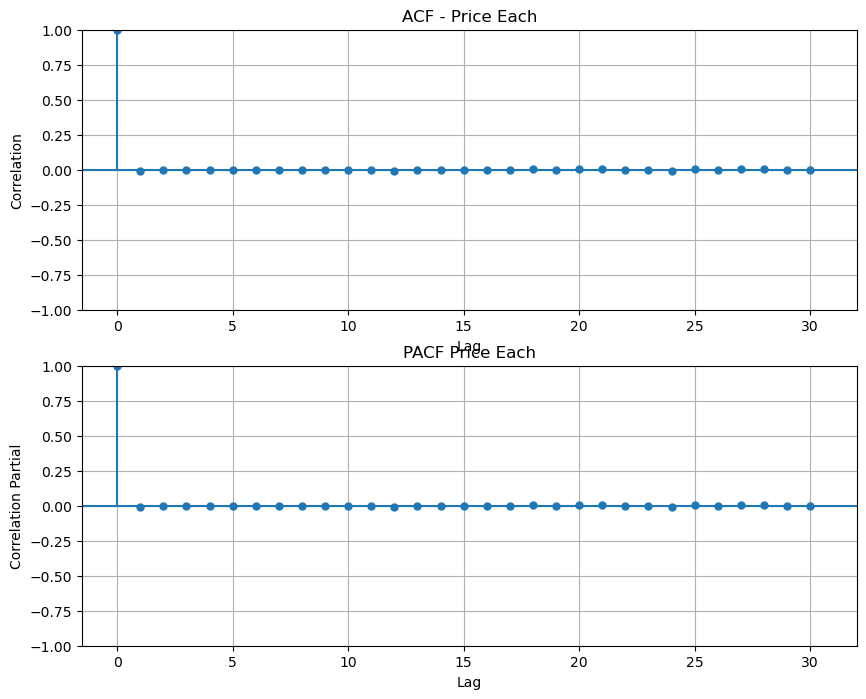

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,8))

#ACF 
plot_acf(data_cleaning['Price Each'],lags=30,zero=True,ax=ax1)
ax1.set_title('ACF - Price Each')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Correlation')
ax1.grid(True)

#PACF 
plot_pacf(data_cleaning['Price Each'],lags=30,zero=True,ax=ax2)
ax2.set_title('PACF Price Each')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Correlation Partial')
ax2.grid(True)

We observe only one significant peak at a lag of zero and no other significant peaks at other lags, this may suggest that our time series is non-stationary due to the presence of a trend or temporal structure.

### Dickey-Fuller test
With visual analysis alone, it is very difficult to determine the stationarity of our series. Let's try to deepen our understanding by using the Dickey-Fuller test

In [98]:
from statsmodels.tsa.stattools import adfuller

# Test  Dickey-Fuller 
result = adfuller(data_cleaning['Order Date'].dropna()) 

# Show the result 
print('Statistic de test :', result[0])
print('Critical Value (à 1%, 5% et 10%) :', result[4])
print('P-value :', result[1])


Statistic de test : -0.5567639926041089
Critical Value (à 1%, 5% et 10%) : {'1%': -3.4303895469316026, '5%': -2.86155747920032, '10%': -2.566779303553426}
P-value : 0.8804554219906724


The test statistic is -0.5567639926041089.

 .The critical values are as follows:
 At 1%: -3.4303895469316026

 At 5%: -2.86155747920032

 At 10%: -2.566779303553426
 
The P-value is 0.8804554219906724.

To conclude on the stationarity of the time series:

The test statistic (-0.5567639926041089) is greater than the critical values (-3.4303895469316026 at 1%, -2.86155747920032 at 5%, -2.566779303553426 at 10%). This suggests that we cannot **reject the null hypothesis that the time series is non-stationary**.

The p-value (0.8804554219906724) is significantly higher than most common significance thresholds (typically 0.05). This confirms that we cannot reject the null hypothesis.

3 .What are our best and worst-selling products?